In [66]:
###Question 1 and 2
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from scipy.special import comb
from collections import Counter
import re
import math
import string
import numpy as np
with open("alice_wonderland.txt") as file:
    txt=file.read()

corpus=[]
#start and stop symbol added to tokenized sentence
for line in sent_tokenize(txt):
        lis = word_tokenize(line)
        x=[word.lower() for word in lis if word.isalpha()]
        y=['<s>']
        y.extend(x)
        y.append('</s>')
        corpus.append(y)
#print(r)
with open('corpus.txt', 'w') as file:
    for line in corpus:
        for word in line:
            file.write(word+' ')
train_set,test_set = train_test_split(corpus,test_size=0.2,random_state=42)
print(len(train_set))
print(len(test_set))


781
196


In [67]:
###Question 3

#calculating MLE for different gram
def mle_gram(b,a):
    if b == 0:
        cnt=0
        for val in a.values():
            cnt+=val
    d={}
    for key in a.keys():
        if a!=None:
            temp=' '.join(key.split()[:-1])
            cnt=b[temp]
        d[key]=a[key]/float(cnt)
    return d

#calculating n-gram
def cal_gram(corpus,n):
    d=[]
    for line in corpus:
        l=[]
        for w in line:
            l.append(w)
            if len(l) > n:
                l.pop(0)
            if len(l) == n:
                gram=" ".join(l)
                d.append(gram)
    counter = Counter(d)
    return counter


mle=[]

for i in range(1,5):
    mle.append(mle_gram(cal_gram(corpus,i-1),cal_gram(corpus,i)))
#print(ml[0])

#Print possible and present n-gram
ng=["Unigram","Bigrams","Trigrams","Quadgrams"]   
for i in range(1,5):
    gram_present=len(cal_gram(corpus,i))
    possb=int(comb(len(cal_gram(corpus,i)),2))
    print(ng[i-1] ,"possible= ",possb)
    print(ng[i-1] ,"present= ",gram_present)
    

Unigram possible=  3111265
Unigram present=  2495
Bigrams possible=  99708381
Bigrams present=  14122
Trigrams possible=  251922681
Trigrams present=  22447
Quadgrams possible=  302149653
Quadgrams present=  24583


In [68]:
###Question 4(a)

def Generator(mle, length_req):
    sent = []
    run = 10
    remain = run

    # n-Gram start character
    end=''
    while True:
        #Sampling next word given last n-gram
        if end == '':
            keys = list(mle.keys())
        else:
            keys = [k for k in mle.keys() if (end + ' ' in k)]

        #Probabilities of n-gram
        prob_list = np.array([mle[k] for k in keys])
        if len(keys) == 0:
            first_Word ='</s>'

        # Generating word with replacement
        word = np.random.choice(keys, 1,replace=True, p=prob_list/np.sum(prob_list))
        first_Word = word[0]
        if ('<s>' in first_Word) and ('</s>' not in first_Word): 
            break
        else:
            pass
    sent = first_Word.split()
    end = ' '.join(sent[1:])
    if len(sent) == 1:
        end = ''
    n = len(first_Word.split())
    
    #Iterating for remaining word
    while(remain >= 0):
        #Sampling next word given last n-gram
        if end == '':
            keys = list(mle.keys())
        else:
            keys = [k for k in mle.keys() if (end + ' ' in k)]
        prob_list = np.array([mle[k] for k in keys])
        prob_list = prob_list/np.sum(prob_list)

        if len(keys) == 0:
            word='</s>'
        word = np.random.choice(keys, 1,replace=True, p=prob_list)
        word=word[0]
        if '<s>' in word:
            pass
        elif '</s>' in word:
            remain -= 1
            if len(sent)-1 >= length_req:
                return ' '.join(sent[1:])
        else:
            sent.append(word.split()[-1])
            remain = run
            end = ' '.join(word.split()[1:])
    return ' '.join(sent[1:])


#Probability of sentence in log space
def Probability(sent, mle):
    n_value = len(list(mle.keys())[0].split(' '))
    words = ("<s> "+sent+" </s>").split(" ")
    prob = 0
    for i in range(n_value - 1,len(words)):
        word = words[i]
        for j in range(i-1,i-(n_value),-1):
           word = words[j]+" "+word
        try:
           prob += math.log(mle[word])
        except KeyError:
            return -1e-10 
    return (prob)


k = 10 
N=4
for i in range(N, 0, -1):
    print (Generator(mle[i-1], k))
    
######Question 4(b)
Probability("presently the rabbit came near her she began in a great hurry", mle[1])

here one of the deepest contempt
either the locks were too large or the rest of the trees a little queer won t you didn t think of any that do alice said very politely if i only wish they would not give all else for two reasons
i think that i ll take about this same thing tone why there could not and bit to dive in that i
a a she of executioner s stay followed witness fire just have the sharply seemed things done think herself her too peeped eyes said proud one on there the you how


-38.720860386181855

In [69]:
###Question 5
class Add1Smooth(object):
    def __init__(self, dicB, dicS):
        self.dicB = dicB
        self.dicS = dicS

    def UpdatedCount(self, bs):
        try:
            num = self.dicB[bs] + 1
        except KeyError:
            num = 1
            
        cnt = 0
        for val in self.dicB.values():
            cnt += val
        den =cnt + len(self.dicB)

        # returns (C+1)*N/(N+V) that is new count
        return int((len(self.dicB) * num)/int(den))

obj = Add1Smooth(cal_gram(corpus,2), cal_gram(corpus,1))
#print(cal_gram(2))
##First Example
print ("Bigram with add-1 smoothing:", obj.UpdatedCount("the queen"))
print ("Bigram without add-1 smoothing", cal_gram(corpus,2)["the queen"])

##Second Example
print ("Bigram with add-1 smoothing:", obj.UpdatedCount("said alice"))
print ("Bigram without add-1 smoothing", cal_gram(corpus,2)["said alice"])


### Drastic change in sentence occurs because only 1% bigram present in corpus - 
## and other 99% bigram steal the probability mass.

Bigram with add-1 smoothing: 24
Bigram without add-1 smoothing 72
Bigram with add-1 smoothing: 39
Bigram without add-1 smoothing 116


Count without and with Good Turing {0: 0.003372716540625392, 1: 0.33266571292322367, 2: 1.1852064220183487, 3: 1.7706821480406385, 4: 3.377049180327869, 5: 4.048543689320389, 6: 5.489208633093525, 7: 5.944954128440367, 8: 6.777777777777778, 9: 5.573770491803279}


Text(0,0.5,'Count Difference')

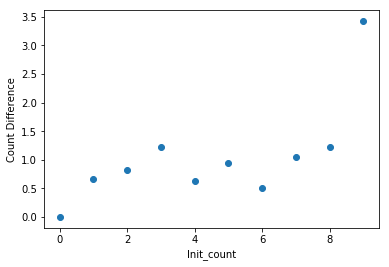

In [71]:
####Question 6

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def freq_of_freq(dic):
    f = {}
    for key in dic.keys():
        freq = dic[key]
        try:
            f[freq] += 1

        except KeyError:
            f[freq] = 1
    f[0]=0
    return f
class GoodTuring(object):
    def __init__(self, dicB, dicC):
        self.dicB = dicB
        self.dicC = dicC
        self.f = {}
        self.newCounts = {}

    def Prob(self, bigram):
        bigram_cnt = 0
        for key in f.keys():
            bigram_cnt += dic[key]

        if bigram not in self.dicB.keys():
            return (self.f[0]/bigram_cnt)
        return self.dicB[bigram]/self.dicC[bigram.split()[0]]


    def NewCounts(self, counts=10):
        dicB = self.dicB
        dicC = self.dicC
        self.f = freq_of_freq(dicB)
        val_cnts = 0
        for key in dicB.keys():
            val_cnts += dicB[key]

        poss_bigram = comb(len(dicC.keys()), 2)
        bigram_present=len(dicC.keys())
        bigram_unpresnt = poss_bigram - bigram_present
        self.f[0] = bigram_unpresnt
        lis = []

        # calculate the new freq_of_freq
        for i in range(counts):
            try:
                self.newCounts[i] = self.f[i+1]*(i+1)/float(self.f[i])
            except ZeroDivisionError:
                lis.append(i)
                continue 

        # estimate lis
        def func(x, a, k): # f(x) = a*exp(-kx) == Nc
            return a*(np.exp(-k*x))
        popt = curve_fit(func, list(self.f.keys()),list(self.f.values()))
        for i in lis:
            self.newCounts[i] = self.f[i+1]*(i+1)\
            /func(i, popt[0], popt[1])

        return self.newCounts

obj = GoodTuring(cal_gram(corpus,2), cal_gram(corpus,1))
val = obj.NewCounts(counts=10)
print ('Count without and with Good Turing',val)

x = [keys for keys in val.keys()]
y = [keys - val[keys] for keys in val.keys()]
plt.scatter(x, y)
plt.xlabel("Init_count")
plt.ylabel("Count Difference")


#### Average d value is 0.80